# Deep learning with vanilla CNN

By Zhu Xiaochen (A0194512H)

In this notebook, we test the vanilla application of convolutional neural networks in image classification and we observe the vanishing gradient problem.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from keras import layers

In [2]:
data_train = tfds.load("deep_weeds", with_info=False, split='train[20%:100%]').take(800)#.filter(lambda x: x['label'] != 8).take(800)
data_valid  = tfds.load("deep_weeds", with_info=False, split='train[0%:20%]').take(200)#.filter(lambda x: x['label'] != 8).take(160)

In [3]:
import math

def preprocess(dict):
  processed_image = dict['image'] / 255
  processed_label = dict['label']
  return processed_image, processed_label

# Use the batch method to prepare batches.
train_ds = (data_train
                .map(preprocess)
                .cache()
                .batch(32)
                .prefetch(tf.data.experimental.AUTOTUNE))

valid_ds = data_valid.map(preprocess).cache().batch(32)

## A neural network model with convolutional layers

In [4]:
from tensorflow import keras
from tensorflow.keras import layers

num_classes = 9

model = keras.models.Sequential([
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(
    optimizer=keras.optimizers.Adam(0.0001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 131072)            0

In [5]:
log = model.fit(
    train_ds, epochs=50, validation_data=valid_ds,
)

Epoch 1/50
25/25 [==============================] - 9s 83ms/step - loss: 7.4725 - accuracy: 0.5250 - val_loss: 7.4143 - val_accuracy: 0.5400
Epoch 2/50
25/25 [==============================] - 2s 65ms/step - loss: 7.5352 - accuracy: 0.5325 - val_loss: 7.4143 - val_accuracy: 0.5400
Epoch 3/50
25/25 [==============================] - 2s 65ms/step - loss: 7.5352 - accuracy: 0.5325 - val_loss: 7.4143 - val_accuracy: 0.5400
Epoch 4/50
25/25 [==============================] - 2s 65ms/step - loss: 7.5352 - accuracy: 0.5325 - val_loss: 7.4143 - val_accuracy: 0.5400
Epoch 5/50
25/25 [==============================] - 2s 65ms/step - loss: 7.5352 - accuracy: 0.5325 - val_loss: 7.4143 - val_accuracy: 0.5400
Epoch 6/50
25/25 [==============================] - 2s 65ms/step - loss: 7.5352 - accuracy: 0.5325 - val_loss: 7.4143 - val_accuracy: 0.5400
Epoch 7/50
25/25 [==============================] - 2s 66ms/step - loss: 7.5352 - accuracy: 0.5325 - val_loss: 7.4143 - val_accuracy: 0.5400
Epoch 8/50
25

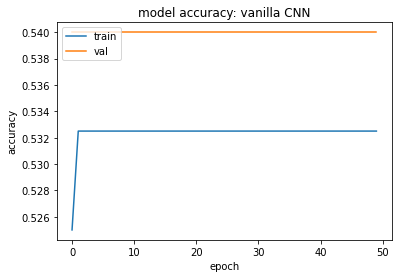

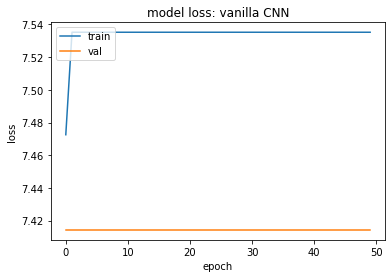

In [7]:
plt.plot(log.history['accuracy'])
plt.plot(log.history['val_accuracy'])
plt.title('model accuracy: vanilla CNN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(log.history['loss'])
plt.plot(log.history['val_loss'])
plt.title('model loss: vanilla CNN')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

That's vanishing gradients.